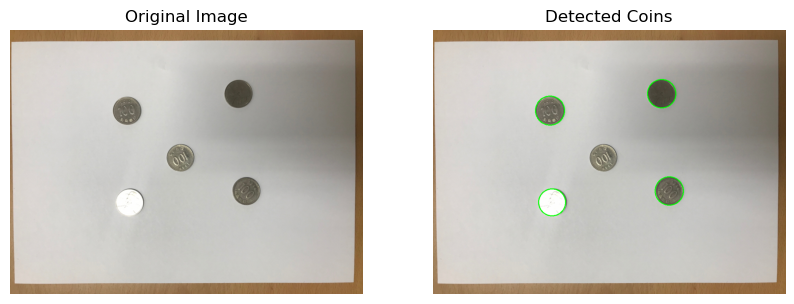

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 읽기
image = cv2.imread('sIMG_8253.JPG')

# 그레이 스케일 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 가우시안 블러 적용
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# 케니 엣지 검출
edges = cv2.Canny(blurred, 30, 150)

# 윤곽선 찾기
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 동전 인식을 위한 반지름 범위 설정 (적절한 값을 설정해야 함)
min_radius = 10
max_radius = 50

# 동전 찾기
detected_coins = []
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)

    # 설정한 반지름 범위 내에 있는 동전만 추가
    if min_radius <= radius <= max_radius:
        detected_coins.append((center, radius))

# 동전을 원으로 표시한 이미지 생성
image_with_coins = image.copy()
for (center, radius) in detected_coins:
    cv2.circle(image_with_coins, center, radius, (0, 255, 0), 2)

# BGR 이미지를 RGB로 변환
image_with_coins_rgb = cv2.cvtColor(image_with_coins, cv2.COLOR_BGR2RGB)

# 원본 이미지와 결과 이미지를 함께 시각화
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image[:, :, ::-1])  # BGR to RGB
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_with_coins_rgb)
plt.title('Detected Coins')
plt.axis('off')

plt.show()

